In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import MissingIndicator,SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv(r"C:\Users\Sushree S Swain\Desktop\Machine Learning\titanic.csv")


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [6]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
280,1172,3,"Oreskovic, Miss. Jelka",female,23.0,0,0,315085,8.6625,NaN,S
284,1176,3,"Rosblom, Miss. Salli Helena",female,2.0,1,1,370129,20.2125,NaN,S
40,932,3,"Karun, Mr. Franz",male,39.0,0,1,349256,13.4167,NaN,C
17,909,3,"Assaf, Mr. Gerios",male,21.0,0,0,2692,7.2250,NaN,C
362,1254,2,"Ware, Mrs. John James (Florence Louise Long)",female,31.0,0,0,CA 31352,21.0000,NaN,S


In [7]:
df['Age'].mean()

30.272590361445783

In [8]:
df['Age'].median()

27.0

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
median_fare = df['Fare'].median()

In [11]:
median_age = df['Age'].median()

In [12]:
df['Age'].fillna(median_age, inplace=True)
print(df)

     PassengerId  Survived  Pclass   
0            892         0       3  \
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch   
0                                Kelly, Mr. James    male  34.5      0      0  \
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
df.drop(columns=['Cabin'])


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S


In [16]:
df_new = df.drop(columns=['Name', 'Cabin','Embarked','Parch','SibSp','Ticket','Pclass','Sex'])


In [17]:
df_new.head()

,PassengerId,Survived,Age,Fare
0,892,0,34.5,7.8292
1,893,1,47.0,7.0000
2,894,0,62.0,9.6875
3,895,0,27.0,8.6625
4,896,1,22.0,12.2875


In [18]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
280,1172,3,"Oreskovic, Miss. Jelka",female,23.0,0,0,315085,8.6625,NaN,S
284,1176,3,"Rosblom, Miss. Salli Helena",female,2.0,1,1,370129,20.2125,NaN,S
40,932,3,"Karun, Mr. Franz",male,39.0,0,1,349256,13.4167,NaN,C
17,909,3,"Assaf, Mr. Gerios",male,21.0,0,0,2692,7.2250,NaN,C
362,1254,2,"Ware, Mrs. John James (Florence Louise Long)",female,31.0,0,0,CA 31352,21.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
299,1191,3,"Johansson, Mr. Nils",male,29.0,0,0,347467,7.8542,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
72,964,3,"Nieminen, Miss. Manta Josefina",female,29.0,0,0,3101297,7.9250,NaN,S
15,907,2,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",female,24.0,1,0,SC/PARIS 2167,27.7208,NaN,C


In [19]:
X_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
146,1038,1,"Hilliard, Mr. Herbert Henry",male,NaN,0,0,17463,51.8625,E46,S
223,1115,3,"Karlsson, Mr. Einar Gervasius",male,21.0,0,0,350053,7.7958,NaN,S
193,1085,2,"Lingane, Mr. John",male,61.0,0,0,235509,12.3500,NaN,Q
305,1197,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,B26,S
188,1080,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [20]:
X_test_new = X_test.drop(columns=['Name', 'Cabin','Embarked','Parch','SibSp','Ticket','Pclass','Sex','PassengerId'])


In [21]:
X_test_new['Age'].fillna(median_age, inplace=True)
X_test_new['Fare'].fillna(median_fare, inplace=True)
print(X_test_new)

      Age     Fare
146  27.0  51.8625
223  21.0   7.7958
193  61.0  12.3500
305  64.0  26.5500
188  27.0  69.5500
..    ...      ...
348  24.0  13.5000
30   50.0  26.0000
174  40.0  31.3875
68   31.0  28.5375
204  25.0  10.5000

[84 rows x 2 columns]


In [22]:
X_test_new.isnull().sum()

Age     0
Fare    0
dtype: int64

In [23]:
X_test['Age'].fillna(median_age, inplace=True)
X_test['Fare'].fillna(median_fare, inplace=True)
print(X_test)

     PassengerId  Pclass                                               Name   
146         1038       1                        Hilliard, Mr. Herbert Henry  \
223         1115       3                      Karlsson, Mr. Einar Gervasius   
193         1085       2                                  Lingane, Mr. John   
305         1197       1  Crosby, Mrs. Edward Gifford (Catherine Elizabe...   
188         1080       3                                    Sage, Miss. Ada   
..           ...     ...                                                ...   
348         1240       2                                   Giles, Mr. Ralph   
30           922       2                       Louch, Mr. Charles Alexander   
174         1066       3         Asplund, Mr. Carl Oscar Vilhelm Gustafsson   
68           960       1                    Tucker, Mr. Gilbert Milligan Jr   
204         1096       2                           Andrew, Mr. Frank Thomas   

        Sex   Age  SibSp  Parch      Ticket     Far

In [24]:
X_test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          65
Embarked        0
dtype: int64

In [25]:
df_new['Age'].fillna(median_age, inplace=True)
df_new['Fare'].fillna(median_fare, inplace=True)
print(df_new)

     PassengerId  Survived   Age      Fare
0            892         0  34.5    7.8292
1            893         1  47.0    7.0000
2            894         0  62.0    9.6875
3            895         0  27.0    8.6625
4            896         1  22.0   12.2875
..           ...       ...   ...       ...
413         1305         0  27.0    8.0500
414         1306         1  39.0  108.9000
415         1307         0  38.5    7.2500
416         1308         0  27.0    8.0500
417         1309         0  27.0   22.3583

[418 rows x 4 columns]


In [26]:
df_new.isnull().sum()

PassengerId    0
Survived       0
Age            0
Fare           0
dtype: int64

In [27]:
X_train_new = X_train.drop(columns=['Name', 'Cabin','Embarked','Parch','SibSp','Ticket','Sex','Pclass','Fare'])
y_train_new = y_train.drop(columns=['Name', 'Cabin','Embarked','Parch','SibSp','Ticket','Sex','Pclass','Fare'])

In [28]:
X_train_new


,PassengerId,Age
280,1172,23.0
284,1176,2.0
40,932,39.0
17,909,21.0
362,1254,31.0
...,...,...
299,1191,29.0
22,914,NaN
72,964,29.0
15,907,24.0


In [29]:
y_train_new

280    1
284    1
40     0
17     0
362    1
      ..
299    0
22     1
72     1
15     1
168    1
Name: Survived, Length: 334, dtype: int64

In [30]:
lr = LinearRegression()

In [31]:
X_train_new.isnull().sum()

PassengerId     0
Age            72
dtype: int64

In [32]:
X_train_new['Age'].fillna(median_age, inplace=True)
print(X_train_new)

     PassengerId   Age
280         1172  23.0
284         1176   2.0
40           932  39.0
17           909  21.0
362         1254  31.0
..           ...   ...
299         1191  29.0
22           914  27.0
72           964  29.0
15           907  24.0
168         1060  27.0

[334 rows x 2 columns]


In [33]:
lr.fit(X_train_new, y_train_new)

LinearRegression()

In [34]:
lr.predict(X_test_new)



c:\Users\Sushree S Swain\Downloads\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Fare
Feature names seen at fit time, yet now missing:
- PassengerId

  warnings.warn(message, FutureWarning)


array([0.3811638 , 0.38847458, 0.38666963, 0.38428538, 0.37829357,
       0.34609696, 0.38608107, 0.38827344, 0.3791945 , 0.38530732,
       0.38821824, 0.38633188, 0.38357083, 0.38609205, 0.34687493,
       0.38517408, 0.38839801, 0.38842129, 0.38787349, 0.38216635,
       0.38587886, 0.38829981, 0.38835458, 0.38763871, 0.38832484,
       0.38466315, 0.38426208, 0.35263133, 0.38763008, 0.38712376,
       0.38832213, 0.38737107, 0.38835339, 0.37633657, 0.38832781,
       0.38784207, 0.38859132, 0.38841181, 0.38651365, 0.38707503,
       0.38661387, 0.38530653, 0.37829357, 0.38254658, 0.38849176,
       0.38816343, 0.34644339, 0.38228337, 0.38327273, 0.38490044,
       0.38844053, 0.37829357, 0.38723846, 0.38433523, 0.38802494,
       0.38779831, 0.38840326, 0.38832213, 0.38840664, 0.38444042,
       0.38425731, 0.38809681, 0.38868554, 0.38676966, 0.38805564,
       0.37937834, 0.38380271, 0.34602219, 0.38305656, 0.38800911,
       0.38015661, 0.30561573, 0.38835176, 0.38701717, 0.38840

In [35]:
y_pred = lr.predict(X_test_new)

c:\Users\Sushree S Swain\Downloads\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Fare
Feature names seen at fit time, yet now missing:
- PassengerId

  warnings.warn(message, FutureWarning)


In [36]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [37]:
print(mae,mse,rmse,r2)

0.47802720171381874 0.24202831850931786 0.4919637369860891 -0.01470696102302238


In [38]:
df_new.head()

,PassengerId,Survived,Age,Fare
0,892,0,34.5,7.8292
1,893,1,47.0,7.0000
2,894,0,62.0,9.6875
3,895,0,27.0,8.6625
4,896,1,22.0,12.2875


C:\Users\Sushree S Swain\AppData\Local\Temp\ipykernel_23964\2661483691.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_new['Age'].dropna(),kde=False,bins=30)


<Axes: xlabel='Age'>

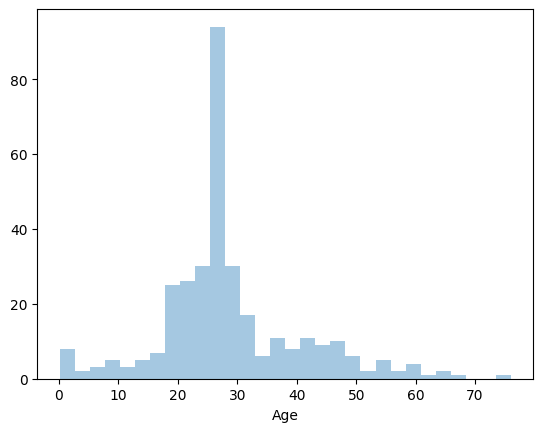

In [39]:
sns.distplot(X_train_new['Age'].dropna(),kde=False,bins=30)

In [40]:
def inpute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [41]:
X_train['Age'] = X_train[['Age','Pclass']].apply(inpute_age,axis=1)

In [42]:
X_train.drop('Cabin',axis=1,inplace=True)

In [43]:
X_train.dropna(inplace=True)

In [44]:
sex = pd.get_dummies(X_train['Sex'],drop_first=True)

In [45]:
sex.head()

,male
280,False
284,False
40,True
17,True
362,False


In [46]:
embark = pd.get_dummies(X_train['Embarked'],drop_first=True)

In [47]:
embark.head()

,Q,S
280,False,True
284,False,True
40,False,False
17,False,False
362,False,True


In [48]:
train = pd.concat([X_train,sex,embark],axis=1)

In [49]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
280,1172,3,"Oreskovic, Miss. Jelka",female,23.0,0,0,315085,8.6625,S,False,False,True
284,1176,3,"Rosblom, Miss. Salli Helena",female,2.0,1,1,370129,20.2125,S,False,False,True
40,932,3,"Karun, Mr. Franz",male,39.0,0,1,349256,13.4167,C,True,False,False
17,909,3,"Assaf, Mr. Gerios",male,21.0,0,0,2692,7.2250,C,True,False,False
362,1254,2,"Ware, Mrs. John James (Florence Louise Long)",female,31.0,0,0,CA 31352,21.0000,S,False,False,True


In [50]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [51]:
train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
280,1172,3,23.0,0,0,8.6625,False,False,True
284,1176,3,2.0,1,1,20.2125,False,False,True
40,932,3,39.0,0,1,13.4167,True,False,False
17,909,3,21.0,0,0,7.2250,True,False,False
362,1254,2,31.0,0,0,21.0000,False,False,True


In [52]:
train.tail()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
299,1191,3,29.0,0,0,7.8542,True,False,True
22,914,1,37.0,0,0,31.6833,False,False,True
72,964,3,29.0,0,0,7.9250,False,False,True
15,907,2,24.0,1,0,27.7208,False,False,False
168,1060,1,37.0,0,0,27.7208,False,False,False


In [53]:
train.drop('PassengerId',axis=1,inplace=True)

In [54]:
train.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
280,3,23.0,0,0,8.6625,False,False,True
284,3,2.0,1,1,20.2125,False,False,True
40,3,39.0,0,1,13.4167,True,False,False
17,3,21.0,0,0,7.2250,True,False,False
362,2,31.0,0,0,21.0000,False,False,True


In [55]:
pclass = pd.get_dummies(train['Pclass'])

In [56]:
pclass.head()

,1,2,3
280,False,False,True
284,False,False,True
40,False,False,True
17,False,False,True
362,False,True,False


In [57]:
logmodel = LogisticRegression()

In [58]:
logmodel.fit(X_train_new,y_train_new)

LogisticRegression()

In [59]:
predictions = logmodel.predict(X_test_new)

c:\Users\Sushree S Swain\Downloads\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Fare
Feature names seen at fit time, yet now missing:
- PassengerId

  warnings.warn(message, FutureWarning)


In [60]:
y_pred = logmodel.predict(X_test_new)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Absolute Error: 0.39285714285714285
Mean Squared Error: 0.39285714285714285
Root Mean Squared Error: 0.6267831705280087
R-squared: -0.6470588235294115


c:\Users\Sushree S Swain\Downloads\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Fare
Feature names seen at fit time, yet now missing:
- PassengerId

  warnings.warn(message, FutureWarning)


In [61]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76        51
           1       0.00      0.00      0.00        33

    accuracy                           0.61        84
   macro avg       0.30      0.50      0.38        84
weighted avg       0.37      0.61      0.46        84



c:\Users\Sushree S Swain\Downloads\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sushree S Swain\Downloads\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sushree S Swain\Downloads\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
confusion_matrix(y_test,predictions)

array([[51,  0],
       [33,  0]], dtype=int64)

In [63]:
lr = LinearRegression()
lr.fit(X_train_new, y_train_new)

LinearRegression()

In [64]:
y_pred = lr.predict(X_test_new)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Absolute Error: 0.47802720171381874
Mean Squared Error: 0.24202831850931786
Root Mean Squared Error: 0.4919637369860891
R-squared: -0.01470696102302238


c:\Users\Sushree S Swain\Downloads\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Fare
Feature names seen at fit time, yet now missing:
- PassengerId

  warnings.warn(message, FutureWarning)


In [65]:
cv_scores = cross_val_score(lr, X_train_new, y_train_new, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [-0.02970595 -0.01027811 -0.01765334 -0.01829473 -0.01976672]
Mean CV Score: -0.019139770411228385


c:\Users\Sushree S Swain\Downloads\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


KeyboardInterrupt: 

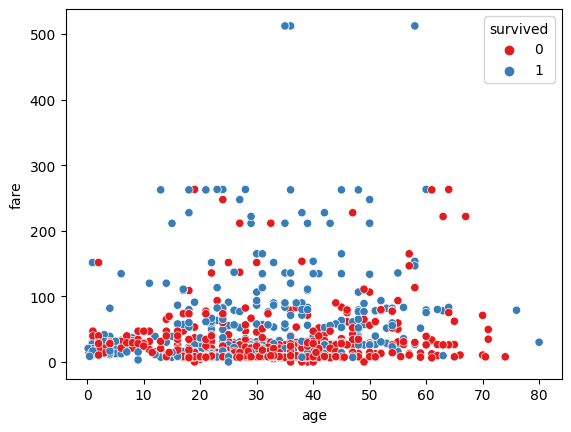

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression

# Load the Titanic dataset
data = fetch_openml("titanic", version=1, as_frame=True)
df = data.frame

# Remove rows with missing values in the "age" and "fare" columns
df = df.dropna(subset=["age", "fare"])

# Define the logistic regression model
model = LogisticRegression()

# Fit the model to predict survival using age and fare
X = df[["age", "fare"]]
y = df["survived"]
model.fit(X, y)

# Plot the data points
sns.scatterplot(data=df, x="age", y="fare", hue="survived", palette="Set1")

# Create a grid of values for prediction
x_min, x_max = df["age"].min() - 1, df["age"].max() + 1
y_min, y_max = df["fare"].min() - 1, df["fare"].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary (logistic regression curve)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

# Add labels and a legend
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Survived", loc="best")

# Show the plot
plt.show()
